In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import the data

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Explortory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# We have a missing value in the BMI column
# missing value for the whole data (201/5110)*100= 4% 
# we have 2 optinas
#  1. deleted : the missing value is 4% of whole data so we can't delete
#  2. fill it : we can fill the data with mean or median 
#     a. mean :If the distribution is roughly normal and free of significant outliers, you can use mean imputation.
#     b.median :if the distribution is skewed or contains outliers, it's more appropriate to use median imputation to fill in the missing values.

In [6]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

# Show the Distribution for BMI

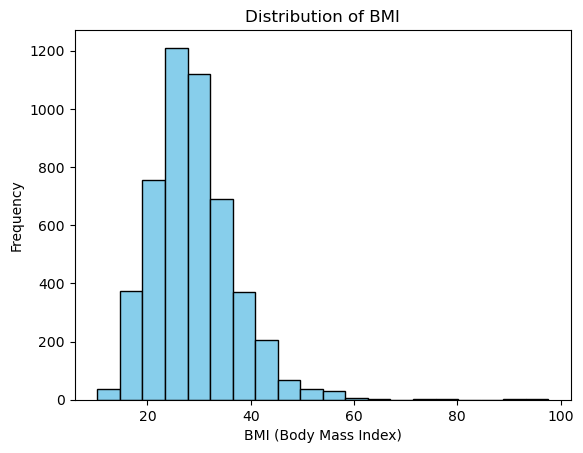

In [7]:

bmi_data = df['bmi']

# Create a histogram
plt.hist(bmi_data, bins=20, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

# Display the histogram
plt.show()


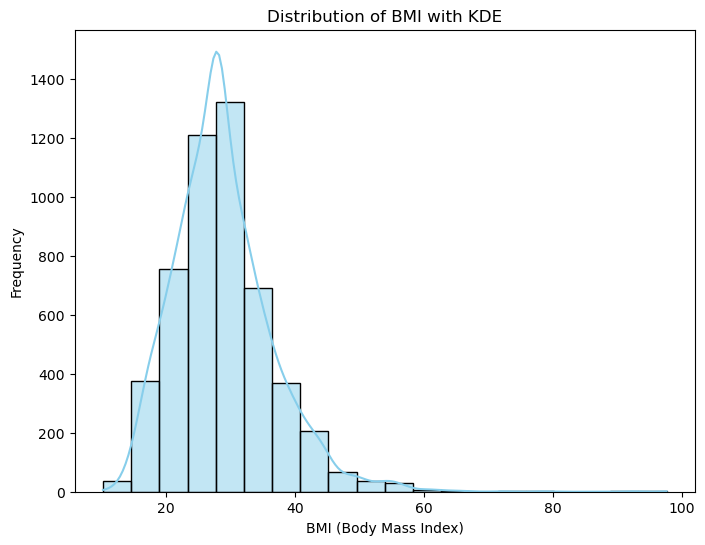

<Figure size 640x480 with 0 Axes>

In [104]:
# Create a histogram with a KDE (Kernel Density Estimate) line
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.histplot(bmi_data, kde=True, color='skyblue', bins=20)

# Add labels and a title
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.title('Distribution of BMI with KDE')

# Display the plot
plt.show()
plt.savefig('my_plot.png')

# Show the Outliers for BMI

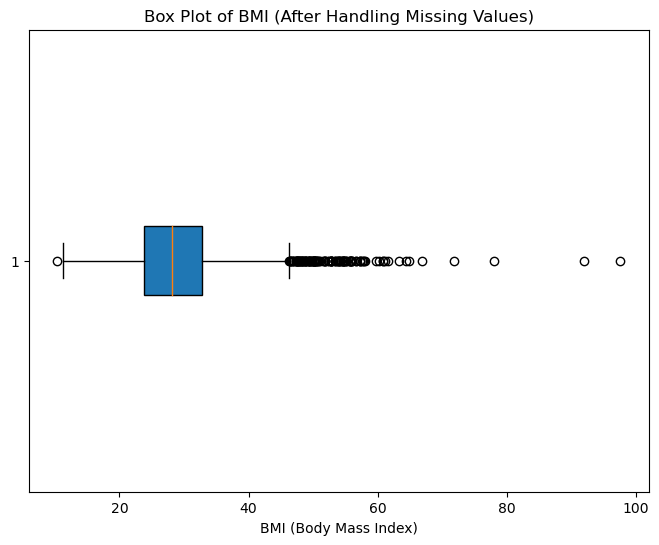

In [9]:
# Handle missing values by filling them with the median (you can use mean or other methods)
bmi_data = bmi_data.fillna(bmi_data.median())

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(bmi_data, vert=False, patch_artist=True)

# Add labels and a title
plt.xlabel('BMI (Body Mass Index)')
plt.title('Box Plot of BMI (After Handling Missing Values)')

# Display the box plot
plt.show()


In [10]:
# as we see we had too much outliers and the distrubtion is positve skew 
# so we will fill the missing value with Median
df["bmi"].fillna(df["bmi"].median(),inplace=True)

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

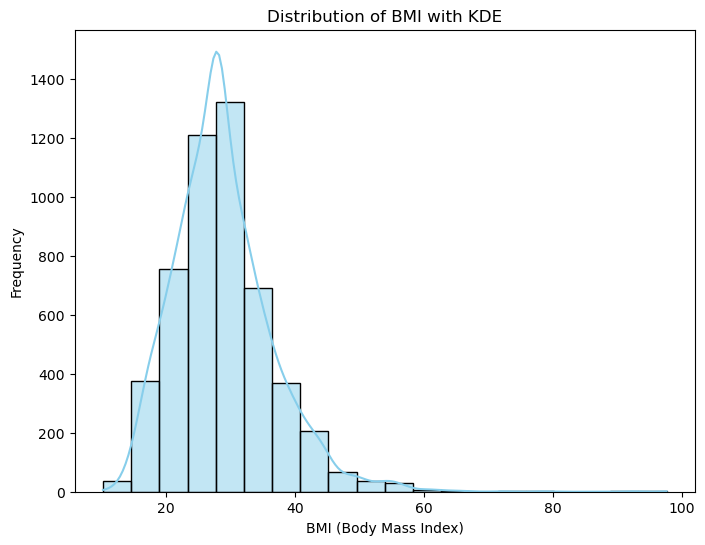

In [12]:
# Create a histogram with a KDE (Kernel Density Estimate) line
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.histplot(df["bmi"], kde=True, color='skyblue', bins=20)

# Add labels and a title
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.title('Distribution of BMI with KDE')

# Display the plot
plt.show()

In [13]:
df["bmi"].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [14]:
# Assuming 'df' is your DataFrame and 'bmi' is the column you want to analyze for outliers
bmi_data = df['bmi']

In [15]:
# Calculate Q1 (first quartile)
Q1 = bmi_data.quantile(0.25)
Q1

23.8

In [16]:
# Calculate Q3 (third quartile)
Q3 = bmi_data.quantile(0.75)
Q3

32.8

In [17]:
# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1
IQR

8.999999999999996

In [18]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound  , upper_bound

(10.300000000000006, 46.29999999999999)

In [19]:
# Count the outliers
outliers_count = ((bmi_data < lower_bound) | (bmi_data > upper_bound)).sum()

# Print the count of outliers
print("Number of outliers in 'BMI':", outliers_count)

Number of outliers in 'BMI': 126


In [20]:
# calculter the prsentage of outliers
bmi_outliers_presentage =(outliers_count/len(df["bmi"]))*100
bmi_outliers_presentage

2.4657534246575343

In [21]:
# the outliers is 2.5% form whole data
# The BMI range categories are as follows:

# Underweight: BMI less than 18.5

# Individuals in this range are considered underweight, which may indicate insufficient body fat or nutrition.
# Normal Weight: BMI 18.5 to 24.9

# This is considered a healthy weight range for most adults.
# Overweight: BMI 25 to 29.9

# Individuals in this range are considered overweight, which may indicate excess body fat.
# Obesity (Class I): BMI 30 to 34.9

# This is the first level of obesity, indicating a moderate degree of excess body fat.
# Obesity (Class II): BMI 35 to 39.9

# This is the second level of obesity, indicating a higher degree of excess body fat.
# Obesity (Class III): BMI 40 or higher

# This is the third level of obesity, indicating a severe degree of excess body fat, often referred to as morbid obesity.

In [22]:
# from that information we can see the higher BMI is around 40
# so we replace the outliers

In [23]:
# we will use IQR method capping
df["bmi"]=np.where(df["bmi"]> upper_bound,upper_bound,
                  np.where(df["bmi"]<lower_bound,lower_bound,df["bmi"]))

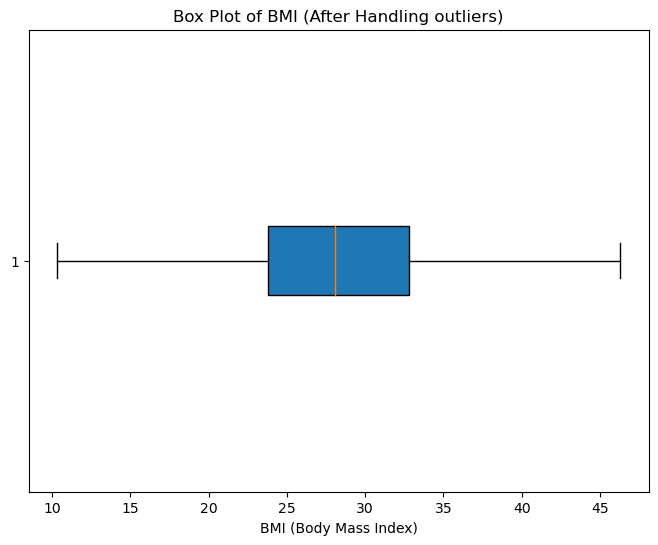

In [24]:
plt.figure(figsize=(8,6))
plt.boxplot(df["bmi"],vert=False,patch_artist=True)


# Add labels and a title
plt.xlabel('BMI (Body Mass Index)')
plt.title('Box Plot of BMI (After Handling outliers)')


plt.show()

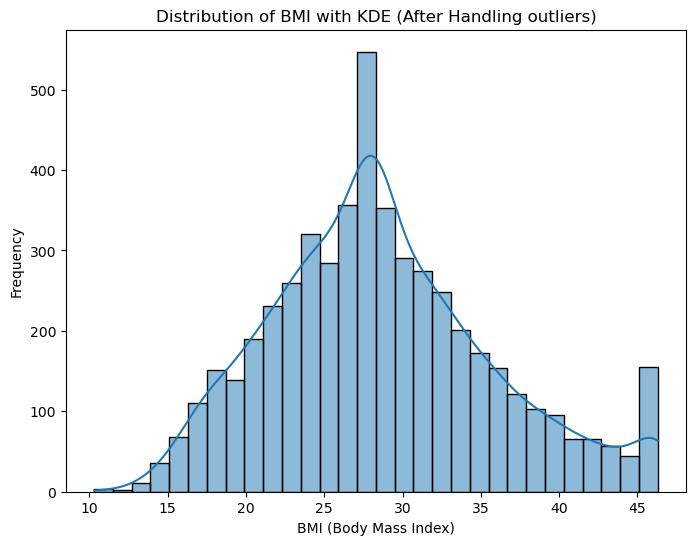

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df["bmi"],kde=True,bins=30)
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel('Frequency')
plt.title('Distribution of BMI with KDE (After Handling outliers)')

plt.show()

## Data Prepartion

In [26]:
# we need to drop "id" column becuse its not nessarry 
df.drop(columns=["id"],inplace=True)

In [27]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Removing the outliers

In [28]:
# first we need to split the numircal and catorical data
numircal_df=df.select_dtypes(include="number")
numircal_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


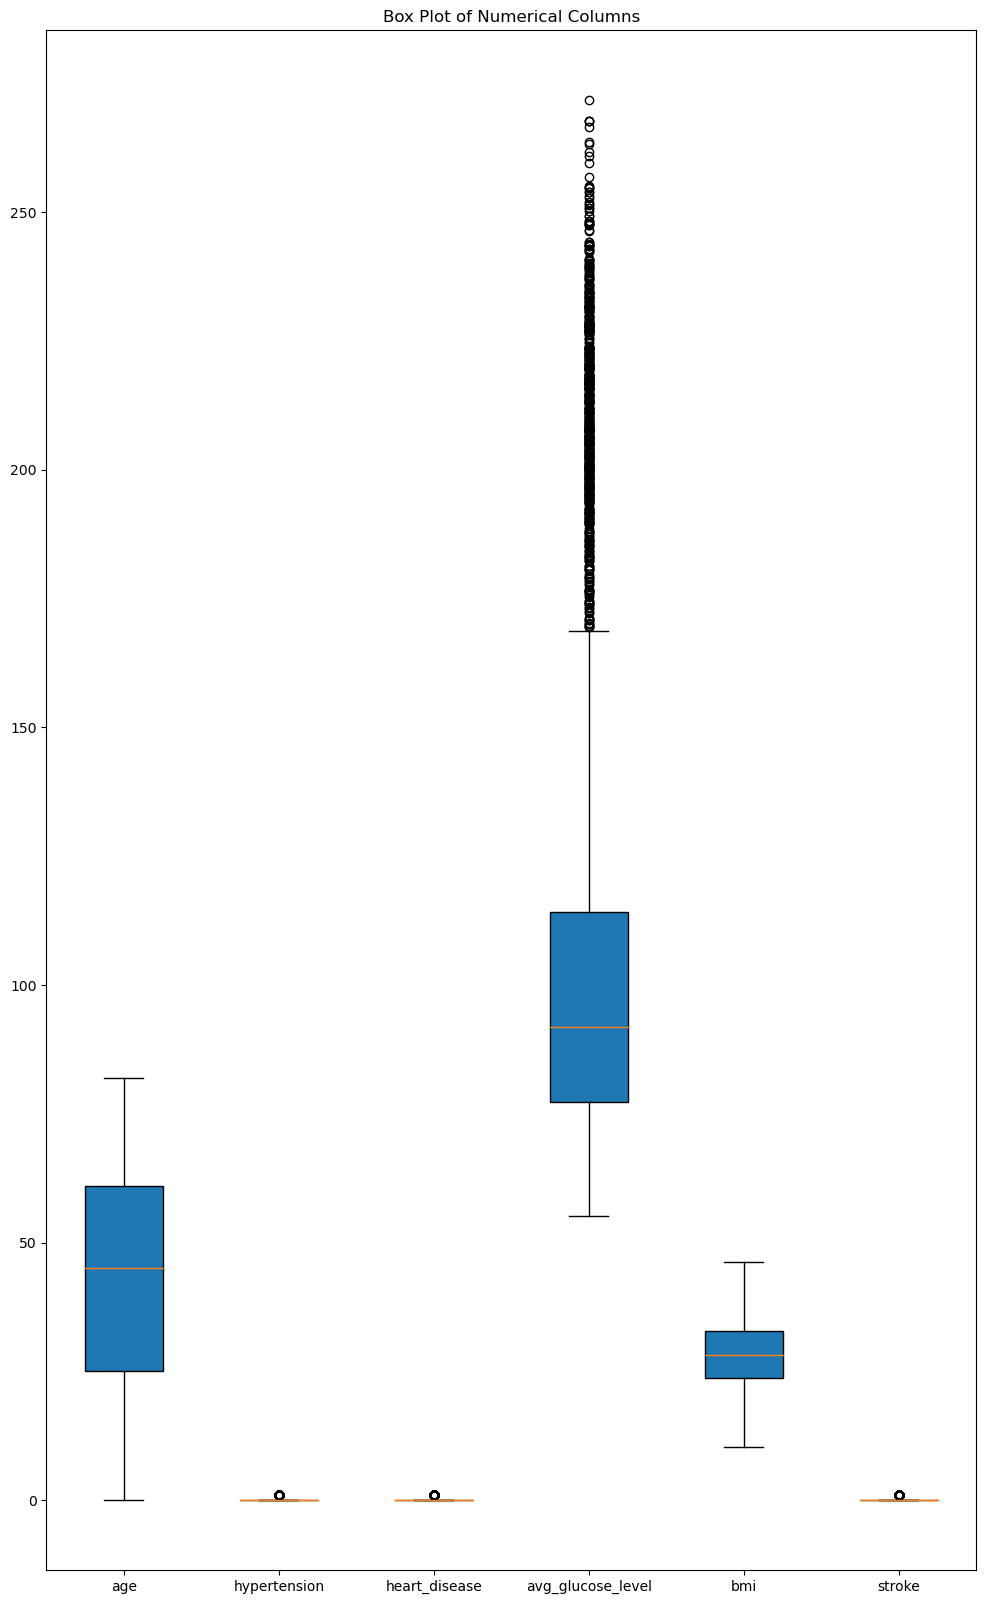

In [29]:
plt.figure(figsize=(12, 20))

# Create a box plot for the numerical columns with column names as x-tick labels
boxplot = plt.boxplot(numircal_df.values, vert=True, patch_artist=True)

# Extract column names for labeling
column_names = numircal_df.columns

# Add labels for the x-axis (column names)
plt.xticks(range(1, len(column_names) + 1), column_names)

# Add a title
plt.title('Box Plot of Numerical Columns')

# Display the box plot
plt.show()


In [30]:
# we see clearly there is outliers espicaly the "avg_glucose_level"
# we will fix it

## Handling avg_glucose_level Outliers

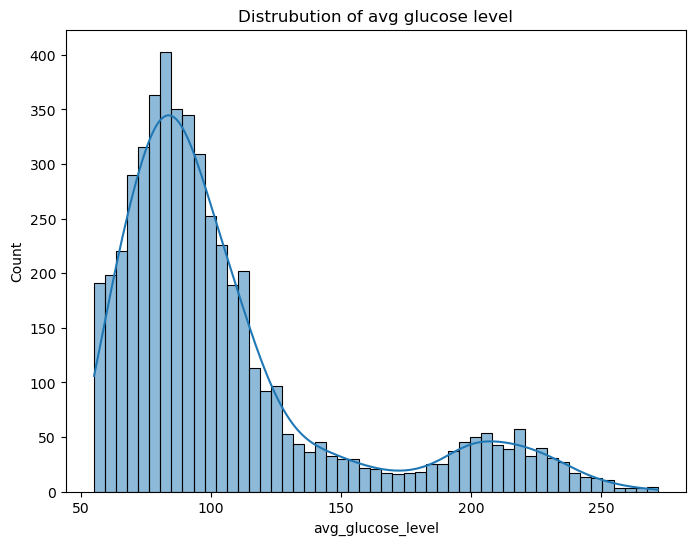

In [31]:
avg_glucose_level_data=df["avg_glucose_level"]

plt.figure(figsize=(8,6))
sns.histplot(avg_glucose_level_data,kde=True)
plt.title("Distrubution of avg glucose level")
plt.show()

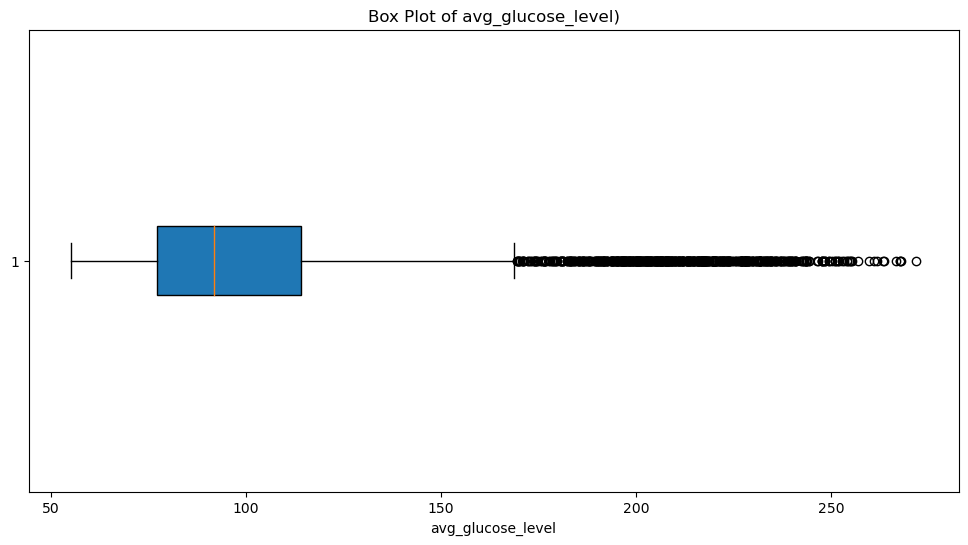

In [32]:
plt.figure(figsize=(12,6))
plt.boxplot(avg_glucose_level_data,vert=False,patch_artist=True)
# Add labels and a title
plt.xlabel('avg_glucose_level')
plt.title('Box Plot of avg_glucose_level)')
plt.show()

In [33]:
# Calculate Q1 and Q3 for 'avg_glucose_level'
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)

# Calculate the IQR for 'avg_glucose_level'
IQR_glucose = Q3_glucose - Q1_glucose

# Define lower and upper bounds for capping
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Cap outliers in 'avg_glucose_level'
df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower=lower_bound_glucose, upper=upper_bound_glucose)

# Now, 'avg_glucose_level' contains the glucose level values with outliers capped using the IQR method.

# We calculate the first quartile (Q1) and third quartile (Q3) for the "avg_glucose_level" column using 
# the quantile() function.

# The IQR for the "avg_glucose_level" column is calculated as the difference between Q3 and Q1.

# We define the lower and upper bounds for capping based on the IQR, with a threshold of 1.5 times the IQR.

# We use the clip() method to cap outliers in the "avg_glucose_level" column by setting values
# below the lower bound to the lower bound value and values above the upper bound to the upper bound value.

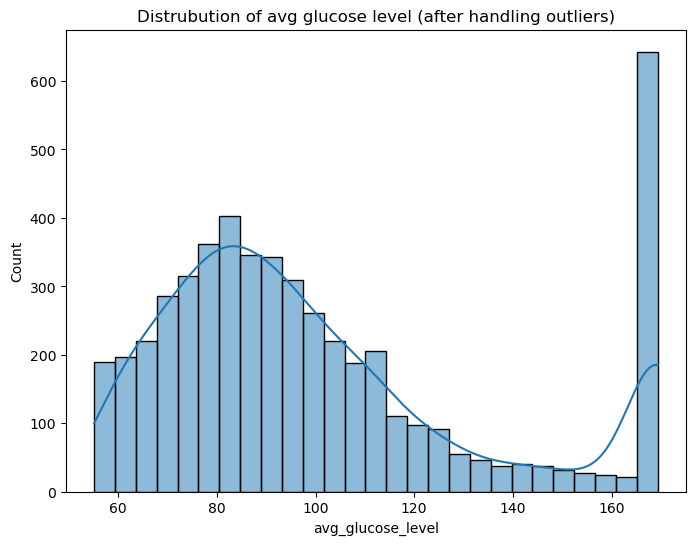

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df["avg_glucose_level"],kde=True)
plt.title("Distrubution of avg glucose level (after handling outliers)")
plt.show()

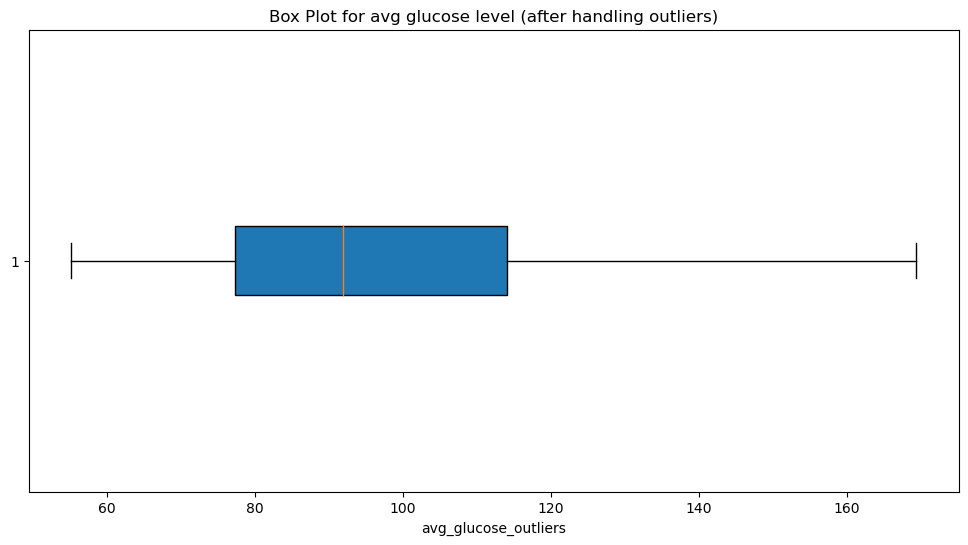

In [35]:
plt.figure(figsize=(12,6))
plt.boxplot(df["avg_glucose_level"],vert=False,patch_artist=True)
plt.xlabel("avg_glucose_outliers")
plt.title("Box Plot for avg glucose level (after handling outliers)")
plt.show()

# Outliers Handling for the Rest

### Hypertension

In [36]:
print("the unique values for hypertension is :",df["hypertension"].unique())
# there is two value for hypertension (0,1)
# this mean there is no outliers

the unique values for hypertension is : [0 1]


### Heart disease

In [37]:
print("the unique values for heart_disease is :",df["heart_disease"].unique())
# this mean there is no outliers

the unique values for heart_disease is : [1 0]


### Stroke

In [38]:
print("the unique values for stroke is :",df["stroke"].unique())
# this mean there is no outliers

the unique values for stroke is : [1 0]


### Age

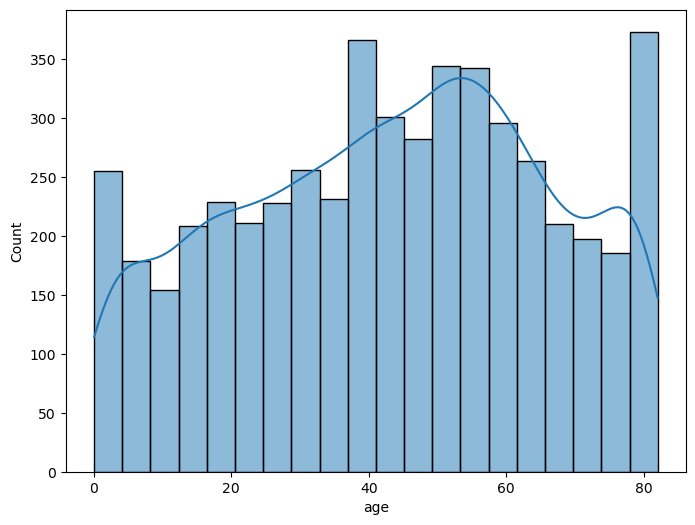

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(df["age"],kde=True)
plt.show()

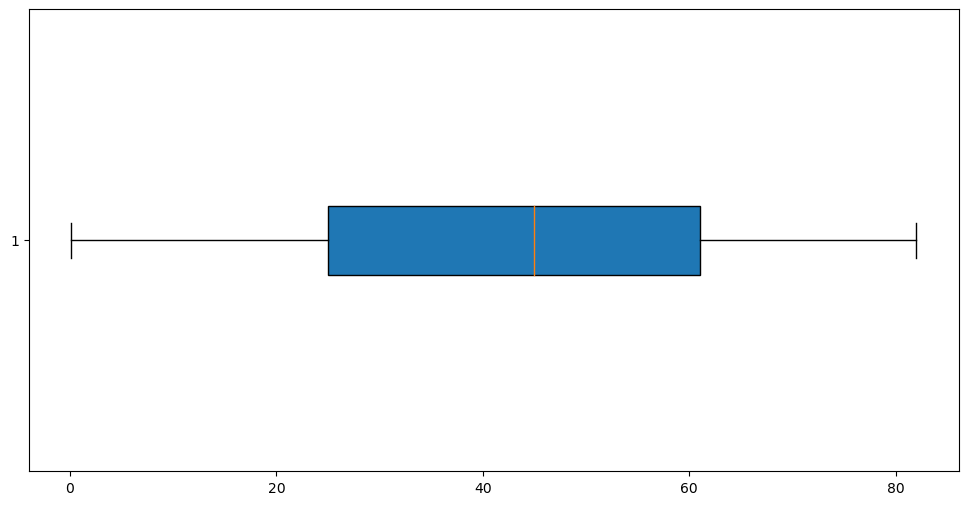

In [40]:
plt.figure(figsize=(12,6))
plt.boxplot(df["age"],vert=False,patch_artist=True)
plt.show()

In [41]:
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [42]:
# We can see the min age is 0.08 this meaning there age under 1 year
age_under_one_year = df[df["age"]<=1]
age_under_one_year.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
844,Male,1.00,0,0,No,children,Rural,89.30,21.4,Unknown,0
951,Male,1.00,0,0,No,children,Rural,123.21,15.1,Unknown,0


In [43]:
# when we inspect the data we can note that for "smoking_status" is "Unknown"
# and surly the baby cant smoke 
# we can get more confirmtion from "ever_married" if it is "No" this surly baby
# so we can change the smoke status to never smoke if under 1 year and ever_married =="No" and work_type="children"

df.loc[(df["age"] <= 1) & (df["ever_married"] == "No") & (df["work_type"]=="children"), "smoking_status"] = "never smoked"

In [44]:
age_under_one_year = df[df["age"]<=1]
age_under_one_year.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,never smoked,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,never smoked,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,never smoked,0
844,Male,1.00,0,0,No,children,Rural,89.30,21.4,never smoked,0
951,Male,1.00,0,0,No,children,Rural,123.21,15.1,never smoked,0


### Gender

In [45]:
df["gender"].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [46]:
# we have 3 uniqe value , we should have just two (male,female)
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [47]:
# as we see there is "Other" value extra
# we need to know how much row we have with this value 
# we will use value counts
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [48]:
# as we see it is just one row 
# so we can drop it 
df[df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [49]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)

In [50]:
df[df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Work type

In [51]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

### Ever Married	

In [52]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

### Residence type

In [53]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

### Smoking status

In [54]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [55]:
df["smoking_status"].value_counts()

never smoked       1940
Unknown            1496
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [56]:
# We observe that there is a significant number of individuals with an "Unknown" smoking status.

### Stroke

In [57]:
df["stroke"].unique()

array([1, 0], dtype=int64)

# Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [60]:
catorigal_df=df.select_dtypes(include="object")
catorigal_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [61]:
# Loop through each column in the DataFrame
for column in catorigal_df:
    # Apply label encoding to the column
    df[column]=label_encoder.fit_transform(df[column])
    
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.2000,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.9900,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.2900,25.6,1,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int32  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 379.2 KB


# Partitoning
## splitting the data for train and test

In [63]:
X = df.drop(columns=["stroke"])
Y = df["stroke"]

In [64]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,169.3575,36.6,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2
2,1,80.0,0,1,1,2,0,105.9200,32.5,2
3,0,49.0,0,0,1,2,1,169.3575,34.4,3
4,0,79.0,1,0,1,3,0,169.3575,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.7500,28.1,2
5106,0,81.0,0,0,1,3,1,125.2000,40.0,2
5107,0,35.0,0,0,1,3,0,82.9900,30.6,2
5108,1,51.0,0,0,1,2,0,166.2900,25.6,1


In [65]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [67]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1604,0,47.0,0,0,1,2,1,65.0400,30.9,2
5085,0,72.0,0,0,1,2,1,83.8900,33.1,1
3138,0,54.0,0,0,1,2,0,81.2600,26.5,0
1324,0,80.0,0,0,1,0,1,84.8600,28.1,0
123,1,56.0,1,0,1,2,0,169.3575,35.8,2
...,...,...,...,...,...,...,...,...,...,...
4172,1,14.0,0,0,0,4,1,60.7000,18.6,0
599,0,59.0,1,0,1,2,1,169.3575,30.8,2
1361,0,59.0,0,0,1,2,1,89.9600,28.1,0
1547,1,59.0,0,1,1,3,0,169.3575,30.4,0


In [68]:
Y_train

1604    0
5085    0
3138    0
1324    0
123     1
       ..
4172    0
599     0
1361    0
1547    0
4960    0
Name: stroke, Length: 4087, dtype: int64

In [69]:
X_train.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.00000,4087.000000,4087.000000
mean,0.417666,43.132009,0.096159,0.053585,0.655738,2.156594,0.508197,101.46779,28.648006,1.389772
std,0.493235,22.662209,0.294845,0.225224,0.475185,1.095733,0.499994,33.44560,7.078839,1.063580
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.12000,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.56000,23.800000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.21000,28.100000,2.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.57500,32.700000,2.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,169.35750,46.300000,3.000000


# Feature Scaling

### Standerzation the data

In [70]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [71]:
# we didn't need to normalize Y becuse it just (0,1)
X_train_std=std.fit_transform(X_train)
X_test_std= std.transform(X_test)

In [72]:
X_train_std

array([[-0.84689249,  0.17070112, -0.32617287, ..., -1.08929865,
         0.31816938,  0.57381886],
       [-0.84689249,  1.27399425, -0.32617287, ..., -0.5256279 ,
         0.62899285, -0.36651702],
       [-0.84689249,  0.4796232 , -0.32617287, ..., -0.60427268,
        -0.30347756, -1.30685289],
       ...,
       [-0.84689249,  0.70028183, -0.32617287, ..., -0.34411695,
        -0.07742413, -1.30685289],
       [ 1.18078742,  0.70028183, -0.32617287, ...,  2.0301031 ,
         0.24752768, -1.30685289],
       [-0.84689249,  0.25896457, -0.32617287, ..., -0.70384953,
         1.47669323,  1.51415473]])

In [73]:
X_test_std

array([[ 1.18078742, -0.66780165, -0.32617287, ...,  0.43515412,
         1.12348474, -0.36651702],
       [-0.84689249,  0.03830595, -0.32617287, ...,  0.26739853,
         0.26165602,  1.51415473],
       [-0.84689249,  1.22986253,  3.06585895, ...,  2.0301031 ,
         0.41706776,  0.57381886],
       ...,
       [-0.84689249,  0.6561501 , -0.32617287, ...,  1.27662333,
        -0.37411926,  1.51415473],
       [-0.84689249,  1.49465288, -0.32617287, ..., -0.78967101,
        -0.93925285, -1.30685289],
       [-0.84689249,  0.96507218, -0.32617287, ..., -0.82106912,
         0.00734591,  1.51415473]])

# Training

### Desicion Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [75]:
DT.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [76]:
Y_predict = DT.predict(X_test_std)

In [77]:
# comapiraing useing matrex

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
ac_dt=accuracy_score(Y_test,Y_predict)
ac_dt

0.9070450097847358

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr=LogisticRegression()

In [82]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [83]:
Y_pred = lr.predict(X_test_std)

In [84]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [85]:
ac_lr

0.9471624266144814

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [87]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [88]:
Y_perd = knn.predict(X_test_std)

In [89]:
ac_knn = accuracy_score(Y_test,Y_perd)

In [90]:
ac_knn

0.9461839530332681

### Random Froest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [92]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [93]:
y_pred= rf.predict(X_test_std)

In [94]:
ac_rf = accuracy_score(Y_test,Y_pred)

In [95]:
ac_rf

0.9471624266144814

### SVM

In [96]:
from sklearn.svm import SVC
sc=SVC()

In [97]:
sc.fit(X_train_std,Y_train)

SVC()

In [98]:
Y_pred = sc.predict(X_test_std)

In [99]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [100]:
ac_sv

0.9471624266144814

# Comparing the 5 Algorithms.

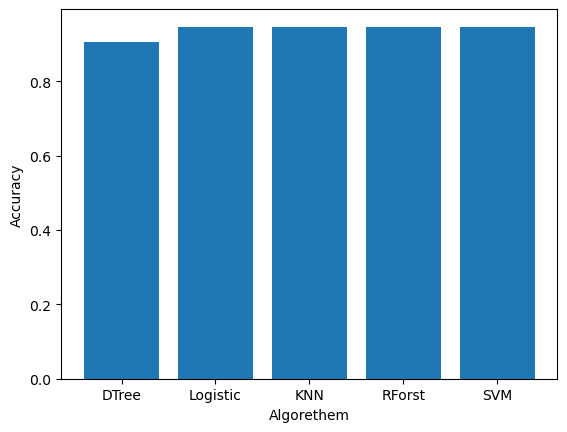

In [101]:
plt.bar(["DTree","Logistic","KNN","RForst","SVM"],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorethem")
plt.ylabel("Accuracy")
plt.show()